In [2]:
import pandas as pd
import numpy as np
data=pd.read_excel('cust_2.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fashion_prod  35 non-null     float64
 1   Savings       35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


In [4]:
import statsmodels.api as sm
X=sm.add_constant(data['fashion_prod'])
X.head(5)

,const,fashion_prod
0,1.0,9.10
1,1.0,0.23
2,1.0,1.92
3,1.0,18.20
4,1.0,0.10


In [5]:
Y=data['Savings']
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,Y, train_size = 0.8, random_state = 100 )
data_lm=sm.OLS(train_y,train_X).fit()
print(data_lm.params)

const          -8.720007
fashion_prod    1.057888
dtype: float64


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#model=LinearRegression()
#model.fit(train_X, train_y)
y_pred = data_lm.predict(test_X)

r_squared = r2_score(test_y, y_pred)
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.41


In [6]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 12.81


In [7]:
r_square = data_lm.rsquared
print(r_square)


0.5789086487921924


In [7]:
from scipy import stats
from scipy.stats import zscore
# Calculate the Z-scores for the residuals
residuals = test_y - y_pred
z_scores = np.abs(stats.zscore(residuals))
data['z_scores']=zscore(data.Savings)
data[ (data.z_scores > 3.0) | (data.z_scores < -3.0) ]

print("Outliers detected by Z-score method:")
print(z_scores)

Outliers detected by Z-score method:
33    1.447168
34    0.551959
31    0.367836
5     0.112977
1     0.476831
13    2.018068
18    0.391168
dtype: float64


In [9]:
influence = data_lm.get_influence()
cooks = influence.cooks_distance

#display Cook's distances
print(cooks)

(array([5.88421142e-03, 3.96169533e-03, 1.35440500e-05, 2.37257425e-03,
       2.74848461e-02, 4.14351200e-03, 8.17358319e-04, 1.46042259e-01,
       7.75593256e-04, 6.42879434e-05, 1.37856192e-02, 1.38843987e-02,
       5.62434522e-02, 5.51334266e-04, 4.65553078e-03, 2.03451531e-02,
       4.22054630e-02, 4.81806548e-01, 6.39168110e-02, 3.05912467e-02,
       3.81374413e-02, 2.47791884e-03, 1.14026769e-02, 3.67008052e-02,
       2.21483825e-02, 4.78056853e-02, 9.57467602e-03, 6.16763829e-02]), array([0.99413439, 0.99604674, 0.99998646, 0.99763045, 0.97291765,
       0.99586572, 0.999183  , 0.86482506, 0.99922473, 0.99993571,
       0.98631617, 0.98621885, 0.94542366, 0.99944883, 0.99535612,
       0.979876  , 0.95873833, 0.62307223, 0.93822996, 0.96990679,
       0.96263438, 0.99752538, 0.98866703, 0.96401435, 0.97811353,
       0.95340261, 0.99047451, 0.94032423]))


In [8]:
leverage_threshold = 3* (len(train_X.columns) + 1) / len(train_X)
influence = data_lm.get_influence()

# finding levarage values
leverage = influence.hat_matrix_diag
leverage_outliers = np.where(leverage >  leverage_threshold)[0]


# Printing outlier values using leverage
print("levarage outliers : \n")
for item in leverage_outliers :
    print("Value is :\n", train_X.iloc[item])
    print("\nLevarage value : ", leverage[item])

levarage outliers : 



In [11]:
p_value = data_lm.pvalues['fashion_prod']
if p_value < 0.1:
    print("The fashion_prod variable is significant.")
else:
    print("The fashion_prod variable is not significant.")

The fashion_prod variable is significant.


<Figure size 800x600 with 0 Axes>

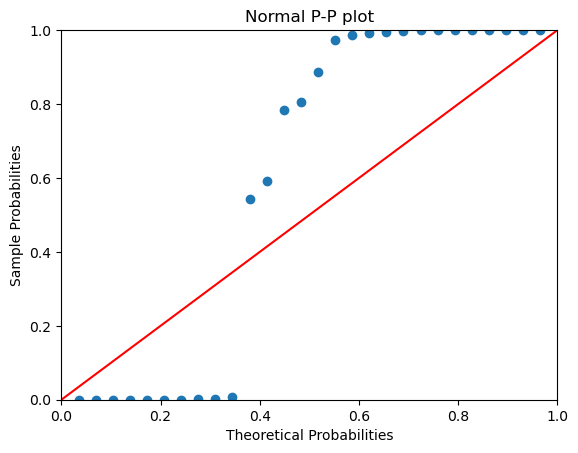

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn
data_resid=data_lm.resid
probplot=sm.ProbPlot(data_resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title("Normal P-P plot")
plt.show()

In [33]:
train_X = train_X.drop(leverage_outliers)
train_Y = train_Y.drop(leverage_outliers)

model_3 = sm.OLS(train_Y, train_X).fit()
model_3.summary()

KeyError: 'X'